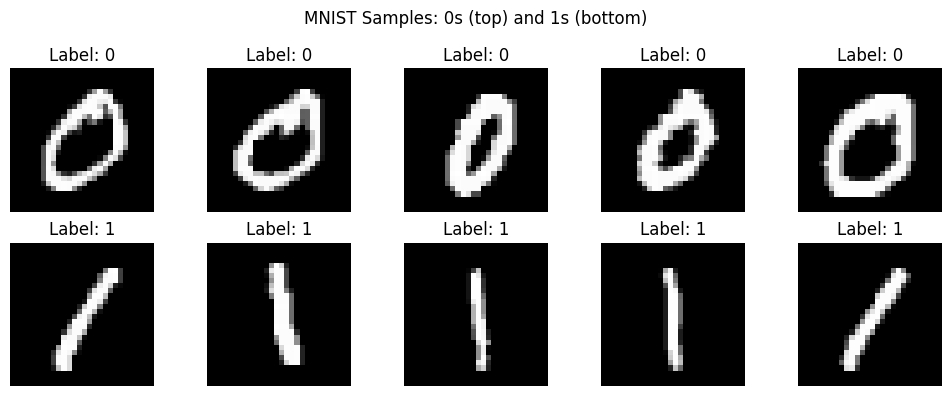

Epoch 0, Loss: 0.2504
Epoch 100, Loss: 0.4677
Epoch 200, Loss: 0.4677
Epoch 300, Loss: 0.4677
Epoch 400, Loss: 0.4677
Epoch 500, Loss: 0.4677
Epoch 600, Loss: 0.4677
Epoch 700, Loss: 0.4677
Epoch 800, Loss: 0.4677
Epoch 900, Loss: 0.4677

Test Accuracy: 0.5366


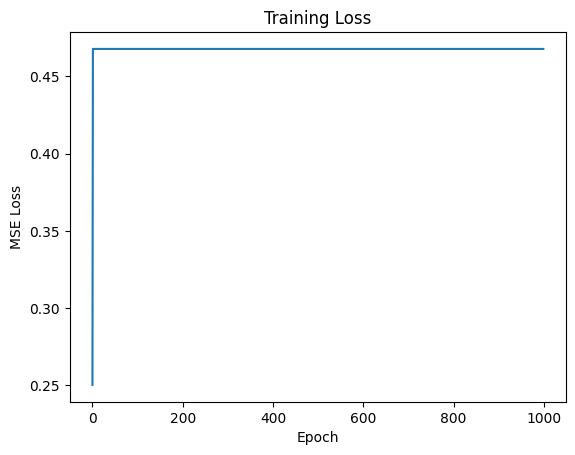

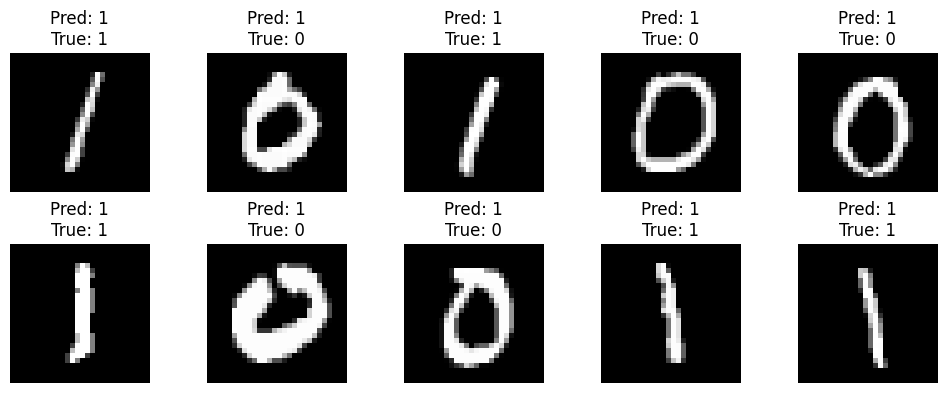

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist  # Only for loading data

class ImageMLP:
    def __init__(self, input_size=784, hidden_size=64, learning_rate=0.01):
        """Initialize MLP for classifying MNIST 0s and 1s"""
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.lr = learning_rate

        # Initialize weights and biases with NumPy
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, 1) * 0.01
        self.b2 = np.zeros((1, 1))

    def sigmoid(self, x):
        """Sigmoid activation using NumPy"""
        return 1 / (1 + np.exp(-np.clip(x, -500, 500)))

    def forward(self, X):
        """Forward pass using NumPy"""
        self.h = self.sigmoid(np.dot(X, self.W1) + self.b1)
        self.out = self.sigmoid(np.dot(self.h, self.W2) + self.b2)
        return self.out

    def backward(self, X, y, output):
        """Backward pass using NumPy"""
        out_error = y - output
        out_delta = out_error * output * (1 - output)

        h_error = np.dot(out_delta, self.W2.T)
        h_delta = h_error * self.h * (1 - self.h)

        # Update weights and biases
        self.W2 += self.lr * np.dot(self.h.T, out_delta)
        self.b2 += self.lr * np.sum(out_delta, axis=0, keepdims=True)
        self.W1 += self.lr * np.dot(X.T, h_delta)
        self.b1 += self.lr * np.sum(h_delta, axis=0, keepdims=True)

    def train(self, X, y, epochs=1000, verbose=False):
        """Train the MLP and return loss history"""
        losses = []
        for epoch in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output)
            loss = np.mean(np.square(y - output))
            losses.append(loss)
            if verbose and epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")
        return losses

    def predict(self, X):
        """Predict binary labels"""
        return (self.forward(X) >= 0.5).astype(np.int32)

def load_and_preprocess_mnist():
    """Load MNIST from TensorFlow and preprocess for 0s and 1s"""
    (X_train, y_train), (X_test, y_test) = mnist.load_data()

    # Filter for digits 0 and 1
    train_mask = (y_train == 0) | (y_train == 1)
    test_mask = (y_test == 0) | (y_test == 1)

    X_train = X_train[train_mask]
    y_train = y_train[train_mask]
    X_test = X_test[test_mask]
    y_test = y_test[test_mask]

    # Keep a copy of original images for visualization (before flattening)
    X_train_images = X_train.copy()

    # Reshape and normalize using NumPy
    X_train = X_train.reshape(-1, 784).astype(np.float32) / 255.0
    X_test = X_test.reshape(-1, 784).astype(np.float32) / 255.0
    y_train = y_train.reshape(-1, 1).astype(np.float32)
    y_test = y_test.reshape(-1, 1).astype(np.float32)

    return X_train, y_train, X_test, y_test, X_train_images

def show_mnist_samples(X_images, y_labels):
    """Display 5 samples each of 0 and 1"""
    # Get indices for 0s and 1s
    zero_indices = np.where(y_labels == 0)[0][:5]
    one_indices = np.where(y_labels == 1)[0][:5]

    # Plot samples
    fig, axes = plt.subplots(2, 5, figsize=(10, 4))
    fig.suptitle("MNIST Samples: 0s (top) and 1s (bottom)")

    # Plot 0s
    for i, idx in enumerate(zero_indices):
        axes[0, i].imshow(X_images[idx], cmap='gray')
        axes[0, i].axis('off')
        axes[0, i].set_title("Label: 0")

    # Plot 1s
    for i, idx in enumerate(one_indices):
        axes[1, i].imshow(X_images[idx], cmap='gray')
        axes[1, i].axis('off')
        axes[1, i].set_title("Label: 1")

    plt.tight_layout()
    plt.show()

# Example usage
if __name__ == "__main__":
    # Load and preprocess MNIST data
    X_train, y_train, X_test, y_test, X_train_images = load_and_preprocess_mnist()

    # Show MNIST samples first
    show_mnist_samples(X_train_images, y_train.flatten())

    # Create and train MLP
    np.random.seed(42)
    mlp = ImageMLP(input_size=784, hidden_size=64, learning_rate=0.1)
    losses = mlp.train(X_train, y_train, epochs=1000, verbose=True)

    # Test the model
    predictions = mlp.predict(X_test)
    accuracy = np.mean(predictions == y_test)
    print(f"\nTest Accuracy: {accuracy:.4f}")

    # Plot loss curve
    plt.plot(losses)
    plt.title("Training Loss")
    plt.xlabel("Epoch")
    plt.ylabel("MSE Loss")
    plt.show()

    # Visualize some test predictions
    fig, axes = plt.subplots(2, 5, figsize=(10, 4))
    for i, ax in enumerate(axes.flat):
        if i < len(X_test):
            ax.imshow(X_test[i].reshape(28, 28), cmap='gray')
            ax.set_title(f"Pred: {predictions[i][0]}\nTrue: {int(y_test[i][0])}")
            ax.axis('off')
    plt.tight_layout()
    plt.show()